# Netflix_Engagement_Report(2023Jan-Jun)

### 데이터 설명
- 컨텐츠 별 총 시청시간 수 데이터 공개 - 국가/배급사 별 데이터 연계도 쉽지 않음

### 데이터 공개 의의
- 넷플릭스가 상반기(1월~6월) 콘텐츠 이용 데이터(콘텐츠 수, 시청 기간)를 첫 공개 > 한국 콘텐츠의 영향력을 데이터로 증명
- Hit-ratio가 높은 기업 중심으로 제작 규모, 수익성이 높아질 것으로 보임

In [1]:
import pandas as pd
import requests

# 엑셀 파일 경로 지정
file_path = "../data/Engagement_Report_2023Jan-Jun.xlsx"  

# 엑셀 파일 불러오기
df = pd.read_excel(file_path)

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18214 entries, 0 to 18213
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Title                18214 non-null  object        
 1   Available Globally?  18214 non-null  object        
 2   Release Date         4855 non-null   datetime64[ns]
 3   Hours Viewed         18214 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 569.3+ KB


In [3]:
df = df[df['Available Globally?'] == 'Yes']

In [4]:
df_sorted_descending = df.sort_values(by='Hours Viewed', ascending=False)
df = df_sorted_descending.copy()

In [5]:
df.drop(columns = 'Available Globally?', inplace = True)

In [6]:
df

,Title,Release Date,Hours Viewed
0,The Night Agent: Season 1,2023-03-23,812100000
1,Ginny & Georgia: Season 2,2023-01-05,665100000
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000
3,Wednesday: Season 1,2022-11-23,507700000
4,Queen Charlotte: A Bridgerton Story,2023-05-04,503000000
...,...,...,...
15535,Ghosts of Sugar Land,2019-10-16,100000
15489,Frontliner,NaT,100000
15475,Fred Armisen: Standup For Drummers,2018-02-06,100000
15472,Frank and Cindy,NaT,100000


In [7]:
df['Title'] = df['Title'].apply(lambda x: x.split('//')[0])

In [8]:
def extract_season(title):
    # ":"를 기준으로 문자열 분리
    split_title = title.split(':')
    if len(split_title) > 1:
        # 분리된 문자열이 "Season"인지 확인하여 "Season" 열에 저장
        if "Season" in split_title[1]:
            return split_title[1].strip()  # 좌우 공백 제거
    return None  # 해당하지 않는 경우 None 반환

In [9]:
df['Season'] = df['Title'].apply(extract_season)

In [10]:
df['Title_revised'] = df['Title'].apply(lambda x: x.split('//')[0].split(':')[0])

In [11]:
df.head()

,Title,Release Date,Hours Viewed,Season,Title_revised
0,The Night Agent: Season 1,2023-03-23,812100000,Season 1,The Night Agent
1,Ginny & Georgia: Season 2,2023-01-05,665100000,Season 2,Ginny & Georgia
2,The Glory: Season 1,2022-12-30,622800000,Season 1,The Glory
3,Wednesday: Season 1,2022-11-23,507700000,Season 1,Wednesday
4,Queen Charlotte: A Bridgerton Story,2023-05-04,503000000,None,Queen Charlotte


## 1. Distribution

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_distribution(data, column, title, color = 'skyblue'):
    """
    데이터프레임에서 특정 열의 분포를 시각화하는 함수
    
    :param data: 데이터프레임
    :param column: 시각화할 열의 이름
    :param title: 시각화 제목
    """
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column].dropna(), bins=30, color=color, kde=False)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()


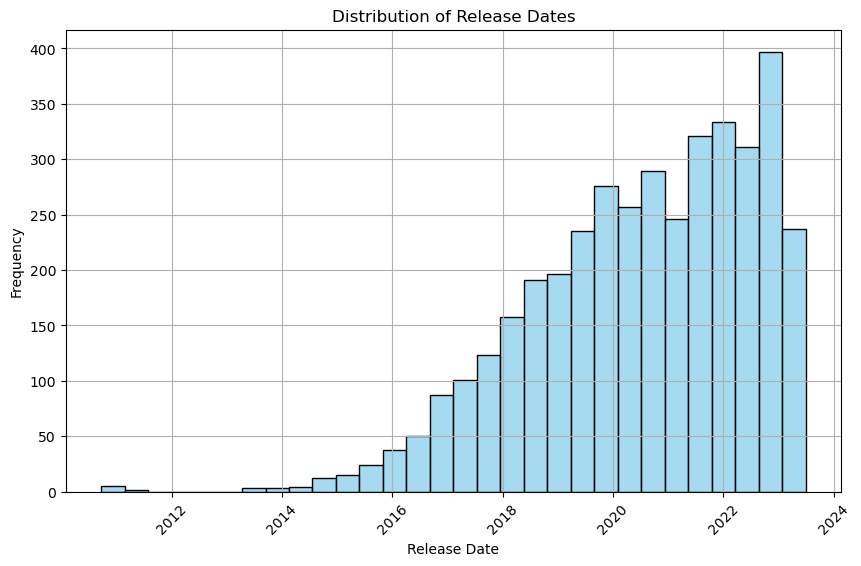

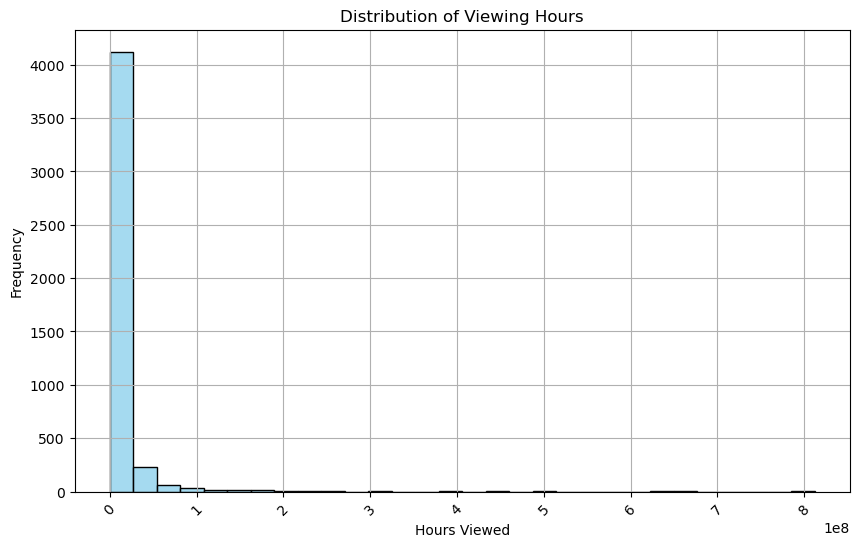

In [13]:
plot_distribution(df, 'Release Date', 'Distribution of Release Dates')
plot_distribution(df, 'Hours Viewed', 'Distribution of Viewing Hours')

### released된 연도/분기 별 hoursviewed 순위

In [14]:
def rank_hours_viewed_by_year_quarter(data):
    # "Release Date" 열에서 연도 및 분기 정보를 추출
    data['Year'] = data['Release Date'].dt.year
    data['Quarter'] = data['Release Date'].dt.quarter
    
    # 연도/분기 별로 같은 컨텐츠들 중 "Hours Viewed"에 따른 순위 계산
    ranked_data = data.groupby(['Year', 'Quarter', 'Title','Title_revised','Season'])['Hours Viewed'].sum().reset_index()
    ranked_data['Rank'] = ranked_data.groupby(['Year', 'Quarter'])['Hours Viewed'].rank(ascending=False, method='dense')
    
    return ranked_data


In [15]:
# 데이터프레임에서 연도/분기별로 같은 컨텐츠들 중 "Hours Viewed"에 따른 순위 계산
ranked_data = rank_hours_viewed_by_year_quarter(df)

In [16]:
# Rank가 1에서 5까지인 데이터 필터링
top_ranked_data = ranked_data[ranked_data['Rank'].between(1, 5)]

In [69]:
top_ranked_data

,Year,Quarter,Title,Title_revised,Season,Hours Viewed,Rank
0,2010.0,3.0,Trailer Park Boys: Season 1,Trailer Park Boys,Season 1,5400000,4.0
1,2010.0,3.0,Trailer Park Boys: Season 2,Trailer Park Boys,Season 2,5800000,3.0
2,2010.0,3.0,Trailer Park Boys: Season 3,Trailer Park Boys,Season 3,6800000,2.0
3,2010.0,3.0,Trailer Park Boys: Season 4,Trailer Park Boys,Season 4,6800000,2.0
4,2010.0,3.0,Trailer Park Boys: Season 5,Trailer Park Boys,Season 5,8400000,1.0
...,...,...,...,...,...,...,...
1597,2023.0,2.0,BEEF: Season 1,BEEF,Season 1,221100000,2.0
1608,2023.0,2.0,FUBAR: Season 1,FUBAR,Season 1,266200000,1.0
1632,2023.0,2.0,Sweet Tooth: Season 2,Sweet Tooth,Season 2,182300000,5.0
1634,2023.0,2.0,The Diplomat: Season 1,The Diplomat,Season 1,214100000,3.0


In [17]:
top_ranked_data[top_ranked_data['Year'] >= 2020]

,Year,Quarter,Title,Title_revised,Season,Hours Viewed,Rank
639,2020.0,1.0,Anne with an E: Season 3,Anne with an E,Season 3,27900000,3.0
667,2020.0,1.0,Hospital Playlist: Season 1,Hospital Playlist,Season 1,35000000,1.0
670,2020.0,1.0,Itaewon Class: Season 1,Itaewon Class,Season 1,29500000,2.0
676,2020.0,1.0,Locke & Key: Season 1,Locke & Key,Season 1,27800000,4.0
677,2020.0,1.0,Love Is Blind: Season 1,Love Is Blind,Season 1,26200000,5.0
...,...,...,...,...,...,...,...
1597,2023.0,2.0,BEEF: Season 1,BEEF,Season 1,221100000,2.0
1608,2023.0,2.0,FUBAR: Season 1,FUBAR,Season 1,266200000,1.0
1632,2023.0,2.0,Sweet Tooth: Season 2,Sweet Tooth,Season 2,182300000,5.0
1634,2023.0,2.0,The Diplomat: Season 1,The Diplomat,Season 1,214100000,3.0


In [18]:
title_top = top_ranked_data['Title_revised'].tolist()

In [25]:
title_top_origin = top_ranked_data['Title'].tolist()

In [67]:
# 중복된 행 찾기
duplicate_rows = top_ranked_data[top_ranked_data.duplicated(subset=['Title_revised'], keep=False)]

In [68]:
duplicate_rows

,Year,Quarter,Title,Title_revised,Season,Hours Viewed,Rank
0,2010.0,3.0,Trailer Park Boys: Season 1,Trailer Park Boys,Season 1,5400000,4.0
1,2010.0,3.0,Trailer Park Boys: Season 2,Trailer Park Boys,Season 2,5800000,3.0
2,2010.0,3.0,Trailer Park Boys: Season 3,Trailer Park Boys,Season 3,6800000,2.0
3,2010.0,3.0,Trailer Park Boys: Season 4,Trailer Park Boys,Season 4,6800000,2.0
4,2010.0,3.0,Trailer Park Boys: Season 5,Trailer Park Boys,Season 5,8400000,1.0
...,...,...,...,...,...,...,...
1556,2023.0,1.0,Ginny & Georgia: Season 2,Ginny & Georgia,Season 2,665100000,2.0
1563,2023.0,1.0,Love Is Blind: Season 4,Love Is Blind,Season 4,229700000,5.0
1570,2023.0,1.0,Outer Banks: Season 3,Outer Banks,Season 3,402500000,4.0
1595,2023.0,1.0,You: Season 4,You,Season 4,440600000,3.0


In [70]:
# 중복되지 않은 행 찾기
unique_rows = top_ranked_data[~top_ranked_data.duplicated(subset=['Title_revised'], keep=False)]
unique_rows


,Year,Quarter,Title,Title_revised,Season,Hours Viewed,Rank
18,2015.0,1.0,Richie Rich: Season 1,Richie Rich,Season 1,8300000,1.0
27,2015.0,2.0,Sense8: Season 1,Sense8,Season 1,8900000,4.0
28,2015.0,2.0,Some Assembly Required: Season 1,Some Assembly Required,Season 1,9700000,3.0
29,2015.0,3.0,Atelier: Season 1,Atelier,Season 1,900000,4.0
31,2015.0,3.0,Club de Cuervos: Season 1,Club de Cuervos,Season 1,4400000,3.0
...,...,...,...,...,...,...,...
1588,2023.0,1.0,The Night Agent: Season 1,The Night Agent,Season 1,812100000,1.0
1597,2023.0,2.0,BEEF: Season 1,BEEF,Season 1,221100000,2.0
1608,2023.0,2.0,FUBAR: Season 1,FUBAR,Season 1,266200000,1.0
1634,2023.0,2.0,The Diplomat: Season 1,The Diplomat,Season 1,214100000,3.0


In [71]:
unique_top = unique_rows['Title_revised'].tolist()

In [19]:
def search_content(query, api_key):
    base_url = 'https://api.themoviedb.org/3/search/multi'
    params = {
        'api_key': api_key,
        'query': query
    }

    response = requests.get(base_url, params=params)
    data = response.json()

    return data['results'] if 'results' in data else []

def get_content_details(content_id, content_type, api_key):
    base_url = f'https://api.themoviedb.org/3/{content_type}/{content_id}'
    params = {
        'api_key': api_key
    }

    response = requests.get(base_url, params=params)
    content_details = response.json()

    return content_details


In [20]:
import pandas as pd

def crawl_content_details(queries, api_key):
    content_data = []

    for query in queries:
        results = search_content(query, api_key)
        if results:
            for result in results:
                content_id = result['id']
                content_type = result['media_type']
                content_details = get_content_details(content_id, content_type, api_key)
                
                # Get genre names
                genres = []
                if 'genres' in content_details:
                    genres = [genre['name'] for genre in content_details['genres']]
                
                content_data.append({
                    'Type': content_type,
                    'Title': content_details.get('title') if content_type == 'movie' else content_details.get('name'),
                    'Overview': content_details.get('overview'),
                    'Release Date': content_details.get('release_date') if 'release_date' in content_details else None,
                    'Popularity': content_details.get('popularity'),
                    'Vote Average': content_details.get('vote_average'),
                    'Vote Count': content_details.get('vote_count'),
                    'Original Title': content_details.get('original_title'),
                    'Original Language': content_details.get('original_language'),
                    #'Backdrop Path': content_details.get('backdrop_path'),
                    #'Poster Path': content_details.get('poster_path'),
                    'Genres': ', '.join(genres),
                    # Add more details as needed
                })

    return pd.DataFrame(content_data)


In [21]:
api_key = '75241e7090c032897a89b229dfa54a48' 

df = crawl_content_details(title_top, api_key)

In [37]:
title_top_info = df.copy()

In [38]:
title_top_info

,Type,Title,Overview,Release Date,Popularity,Vote Average,Vote Count,Original Title,Original Language,Genres
0,tv,Trailer Park Boys,Follow the booze-fueled misadventures of three...,None,466.030,7.700,235.0,None,en,Comedy
1,tv,Trailer Park Boys: The SwearNet Show,"Take three Trailer Park Boys, add one dysfunct...",None,57.413,10.000,1.0,None,en,Comedy
2,tv,Trailer Park Boys: JAIL,It's been peaceful and tranquil in Sunnyvale T...,None,104.434,6.700,7.0,None,en,Comedy
3,tv,Trailer Park Boys: Out of the Park: Europe,"A lot of liquor an whores, mustard and bologna...",None,45.425,6.300,28.0,None,en,"Action & Adventure, Comedy"
4,tv,Trailer Park Boys: The Animated Series,Nova Scotia’s favorite miscreants have always ...,None,33.595,7.200,43.0,None,en,"Animation, Comedy"
...,...,...,...,...,...,...,...,...,...,...
1821,movie,The Boudoir Diplomat,The ambassador of the Kingdom of Luvaria order...,1931-02-17,1.388,0.000,0.0,Liebe auf Befehl,de,Comedy
1822,movie,The Diplomatic Pouch,The film's plot is based on the real murder of...,1927-02-28,1.960,4.200,8.0,Сумка дипкур'єра,uk,"Thriller, Drama, History"
1823,movie,The Diplomat Hotel,Victoria Lansang is a popular news reporter wh...,2013-07-27,2.441,0.000,0.0,The Diplomat Hotel,en,"Mystery, Horror, Thriller, Drama"
1824,movie,The Gay Diplomat,Captain Orloff is sent to Bucharest to capture...,1931-08-22,3.582,4.000,5.0,The Gay Diplomat,en,"Drama, Romance"


In [28]:
#title_top_info.to_csv('../data/title_top5_origin_2020_info.csv',index = False, encoding = 'utf-8-sig')

In [44]:
# 'listed_in' 컬럼의 요소를 쪼개어 새로운 컬럼 생성
listed_in_split = title_top_info['Genres'].str.split(', ')

# 새로운 컬럼의 초기화
for genre in set(title_top_info['Genres'].str.split(', ').sum()):
    df[genre] = 0

# 각 요소가 포함되어 있는지 여부를 1 또는 0으로 인코딩
for index, row in df.iterrows():
    for genre in listed_in_split[index]:
        title_top_info.at[index, genre] = 1


In [47]:
title_top_info

,Type,Title,Overview,Release Date,Popularity,Vote Average,Vote Count,Original Title,Original Language,Genres,...,Reality,Mystery,Romance,Fantasy,War & Politics,Soap,Science Fiction,Talk,Western,News
0,tv,Trailer Park Boys,Follow the booze-fueled misadventures of three...,NaN,466.030,7.700,235.0,NaN,en,Comedy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tv,Trailer Park Boys: The SwearNet Show,"Take three Trailer Park Boys, add one dysfunct...",NaN,57.413,10.000,1.0,NaN,en,Comedy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tv,Trailer Park Boys: JAIL,It's been peaceful and tranquil in Sunnyvale T...,NaN,104.434,6.700,7.0,NaN,en,Comedy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tv,Trailer Park Boys: Out of the Park: Europe,"A lot of liquor an whores, mustard and bologna...",NaN,45.425,6.300,28.0,NaN,en,"Action & Adventure, Comedy",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tv,Trailer Park Boys: The Animated Series,Nova Scotia’s favorite miscreants have always ...,NaN,33.595,7.200,43.0,NaN,en,"Animation, Comedy",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,movie,The Boudoir Diplomat,The ambassador of the Kingdom of Luvaria order...,1931-02-17,1.388,0.000,0.0,Liebe auf Befehl,de,Comedy,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1822,movie,The Diplomatic Pouch,The film's plot is based on the real murder of...,1927-02-28,1.960,4.200,8.0,Сумка дипкур'єра,uk,"Thriller, Drama, History",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1823,movie,The Diplomat Hotel,Victoria Lansang is a popular news reporter wh...,2013-07-27,2.441,0.000,0.0,The Diplomat Hotel,en,"Mystery, Horror, Thriller, Drama",...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1824,movie,The Gay Diplomat,Captain Orloff is sent to Bucharest to capture...,1931-08-22,3.582,4.000,5.0,The Gay Diplomat,en,"Drama, Romance",...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
title_top_info.columns

Index(['Type', 'Title', 'Overview', 'Release Date', 'Popularity',
       'Vote Average', 'Vote Count', 'Original Title', 'Original Language',
       'Genres', 'Comedy', 'Action & Adventure', 'Animation', '', 'Crime',
       'TV Movie', 'Drama', 'Documentary', 'Horror', 'Music', 'War',
       'Sci-Fi & Fantasy', 'Kids', 'Family', 'Adventure', 'History', 'Action',
       'Thriller', 'Reality', 'Mystery', 'Romance', 'Fantasy',
       'War & Politics', 'Soap', 'Science Fiction', 'Talk', 'Western', 'News'],
      dtype='object')

In [58]:
genre_cols = ['Comedy', 'Action & Adventure', 'Animation', 'Crime',
       'TV Movie', 'Drama', 'Documentary', 'Horror', 'Music', 'War',
       'Sci-Fi & Fantasy', 'Kids', 'Family', 'Adventure', 'History', 'Action',
       'Thriller', 'Reality', 'Mystery', 'Romance', 'Fantasy',
       'War & Politics', 'Soap', 'Science Fiction', 'Talk', 'Western', 'News']

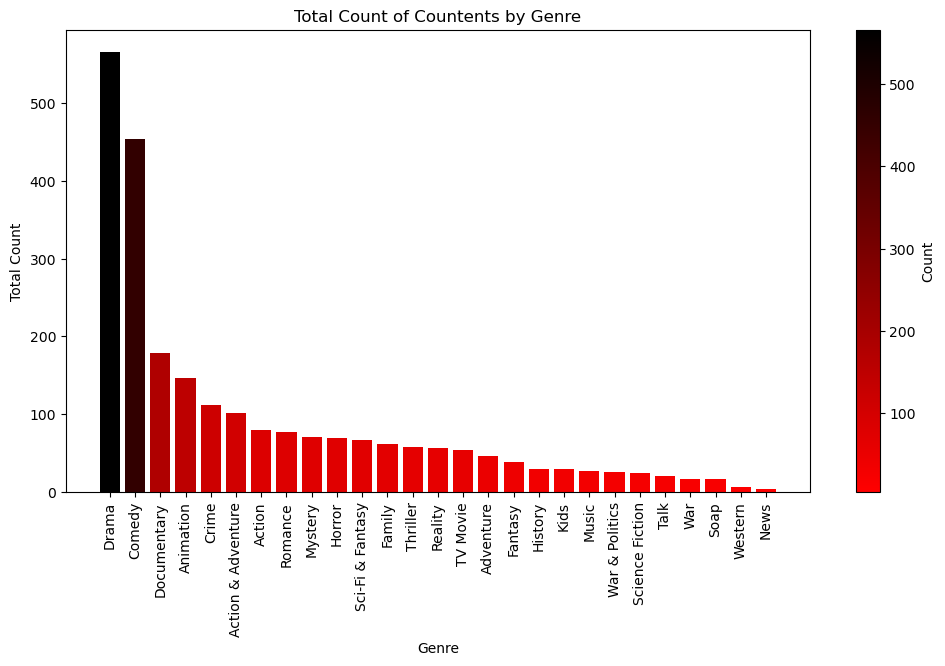

In [77]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max.columns', None)

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

def visualize_genre_counts(df, genre_cols, colormap, title = 'Total Count of Shows by Genre'):
    # 장르 열의 값을 합산하여 총 합 계산
    genre_counts = df[genre_cols].sum()

    # 값이 높은 순서대로 정렬
    genre_counts_sorted = genre_counts.sort_values(ascending=False)

    # 그래프 크기 설정
    plt.figure(figsize=(12, 6))

    # 컬러맵 생성
    cmap = LinearSegmentedColormap.from_list('custom', [(1, 0, 0), (0, 0, 0)])

    # 막대 그래프 그리기
    bars = plt.bar(genre_counts_sorted.index, genre_counts_sorted, color=cmap(genre_counts_sorted/genre_counts_sorted.max()))

    # x 축 라벨 설정
    plt.xlabel('Genre')

    # y 축 라벨 설정
    plt.ylabel('Total Count')

    # 제목 설정
    plt.title(title)

    # x 축 눈금 라벨 회전
    plt.xticks(rotation=90)

    # 컬러바 설정
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=genre_counts_sorted.min(), vmax=genre_counts_sorted.max()))
    sm._A = []
    cbar = plt.colorbar(sm)
    cbar.set_label('Count')

    # 그리드 추가
    # plt.grid(True)

    # 그래프 출력
    plt.show()

# 함수 호출
visualize_genre_counts(title_top_info, genre_cols, 'custom','Total Count of Countents by Genre')

In [61]:
movie_info = title_top_info[title_top_info['Type'] == 'movie']

In [62]:
tv_info = title_top_info[title_top_info['Type'] == 'tv']

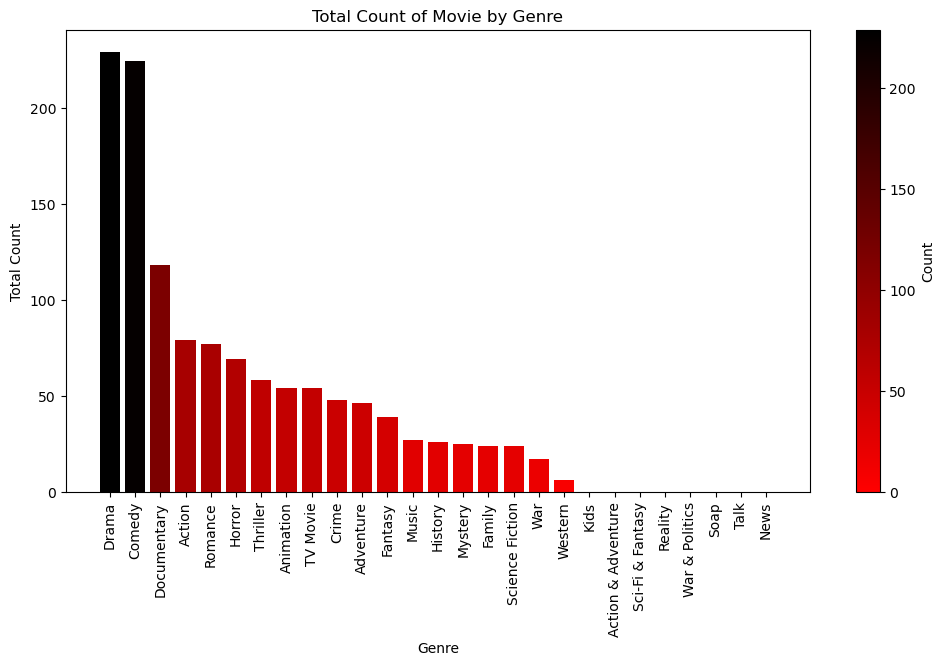

In [74]:
visualize_genre_counts(movie_info, genre_cols, 'custom','Total Count of Movie by Genre')

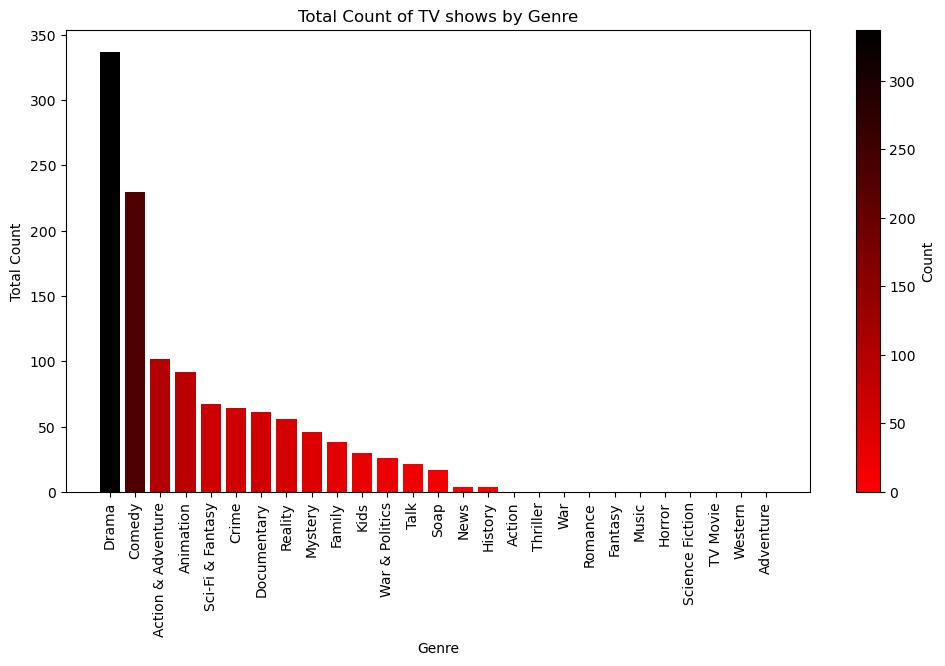

In [76]:
visualize_genre_counts(tv_info, genre_cols, 'custom','Total Count of TV shows by Genre')

In [56]:
#title_top_info.to_csv('../data/title_top5_origin_2020_info.csv',index = False)